# Implementing Homophily: The Fatman Evolutionary Model
### Let us visualise Homophily with the help of a hypothetical model
***
Importing all the needed Dependancies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output

***
First of all, Lets write a function create a graph with N People(Vertices) and assign random BMI values to each person.

In [2]:
def CreateGraph(NumNodes):
    G = nx.Graph()
    for each in range(1,NumNodes+1):
        G.add_node(each)
        G.nodes[each]['Name'] = random.randint(15,40)#Assigning a random BMI Value to each node.
        G.nodes[each]['Type'] = 'Person'#To know that this is of type person and not a focus
    
    #This is the list of foci which we would like to add to our network
    Foci = ['Gym','Eatout','Movie Club','Karate Club','Yoga Club']
    i = NumNodes+1
    for Focus in Foci:
        G.add_node(i)
        G.nodes[i]['Name'] = Focus
        G.nodes[i]['Type'] = 'Foci'
        i=i+1
    return G

***
Let's Write a function to visualise the graph now.

In [3]:
def VisualiseGraph(G):
    LabelDict = {}
    Nodesize = []
    Colours = []
    for node in list(G.nodes()):
        LabelDict[node] = G.nodes[node]['Name']#Updating Labels for the nodes to visualise 
        if G.nodes[node]['Type'] == 'Person':
            #Updating the size of the nodes based on BMI for better visualisation
            Nodesize.append(G.nodes[node]['Name']**2*0.7)#Scaling the size according to the need
            if G.nodes[node]['Name']==40:
                Colours.append('red')
            elif G.nodes[node]['Name']==15:
                Colours.append('green')
            #Setting the color of the all people to green
            else:    
                Colours.append('orange')
        else:
            #Updating the size of the foci nodes
            Nodesize.append(1500)
            #Setting the color of all the foci to blue
            Colours.append('blue')
    nx.draw(G,labels = LabelDict,node_size=Nodesize,node_color = Colours)
    plt.show()

***
Now, Let's Create and visualise a graph

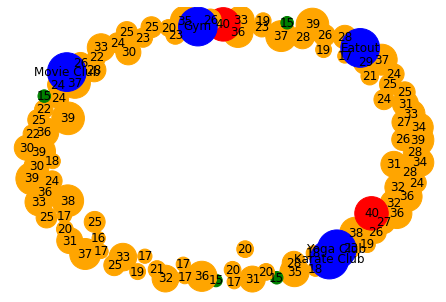

In [13]:
G = CreateGraph(100)
VisualiseGraph(G)

***
Now, Let's write a function which would add connect every person to only one focus intially

In [5]:
def AddEdgesToFoci(G):
    PersonNodes = []
    FociNodes = []
    for node in G.nodes():
        if G.nodes[node]['Type']=='Person':
            PersonNodes.append(node)
        else:
            FociNodes.append(node)
    for person in PersonNodes:
        focus = random.choice(FociNodes)
        G.add_edge(person,focus)
    return G

Lets try this function out and add edges from each person to one focus

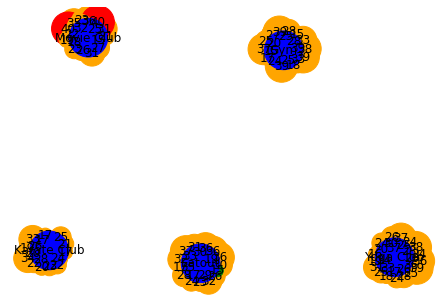

In [14]:
G = AddEdgesToFoci(G)
VisualiseGraph(G)

***
Now, Let's add a function which would implement Homophily<br>
That is, we will add edges based on a probability, which is inversely proportional to the difference between their BMI Levels

In [15]:
def Homophily(G):
    PersonNodes = []
    for node in G.nodes():
        if G.nodes[node]['Type']=='Person':
            PersonNodes.append(node)
    for u in PersonNodes:
        for v in PersonNodes:
            if u!=v:
                diff = abs(G.nodes[u]['Name'] - G.nodes[v]['Name'])
                probability = 1/(1000+diff)
                r = random.uniform(0,1)
                if r<probability:
                    G.add_edge(u,v)
    return G

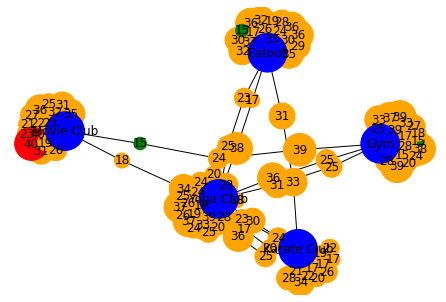

In [16]:
G = Homophily(G)
VisualiseGraph(G)

looks good!
***
Now, let us add edges which are a result of Triadic Closure and create a function for the same

In [17]:
def TriadicClosure(G,p):# p is the probability that a friendship is formed due to 1 triadic closure
    EdgeFormationProbability = []
    for u in G.nodes():
        for v in G.nodes():
            #Either of the node should be of the type 'Person', cant form an edge between two foci
            if u!=v and (G.nodes[u]['Type']=='Person' or G.nodes[v]['Type']=='Person'):
                uNeighbours = set(G.neighbors(u))
                vNeighbours = set(G.neighbors(v))
                CommonNeighbors = uNeighbours & vNeighbours
                k = len(CommonNeighbors)
                Probability = 1-(1-p)**k
                temp = []
                temp.append(u)
                temp.append(v)
                temp.append(Probability)
                EdgeFormationProbability.append(temp)
    for PossibleEdge in EdgeFormationProbability:
        r = random.uniform(0,1)
        if r<PossibleEdge[2]:
            G.add_edge(PossibleEdge[0],PossibleEdge[1])
    return G

Let's see if the function worked. We will visualise the changes due to triadic closures over a period of time.

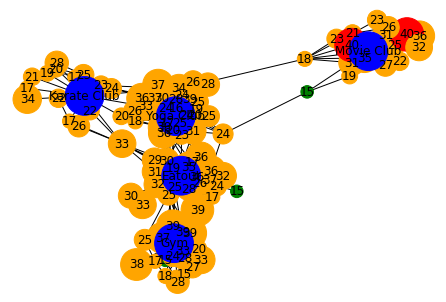

In [18]:
i=0
while(i<10):
    G = TriadicClosure(G,0.01)
    VisualiseGraph(G)
    clear_output(wait = True)
    plt.pause(0.5)
    i=i+1

***
So far, we have added selection based edges on our graph.<br>
Now, let's implement social influence.
That is, People who are neighbours to eatout will have their BMIs increased by 1 every iteration.<br>
Similarly, we will decrease the BMI for the neighbours of gym.

In [11]:
def UpdateBMIDueToSocialInfluence(G):
    FociNodes = []
    for node in G.nodes():
        if G.nodes[node]['Type']=='Focus':
            FociNodes.append(node)
    for fnode in FociNodes:
        if G.nodes[fnode]['Name']=='Eatout':
            for neighbor in G.neighbors(fnode):
                if G.nodes[neighbor]['Name']!=40:
                    G.nodes[neighbor]['Name'] = G.nodes[neighbor]['Name']+1
        elif G.nodes[fnode]['Name']=='Eatout':
            for neighbor in G.neighbors(fnode):
                if G.nodes[neighbor]['Name']!=15:
                    G.nodes[neighbor]['Name'] = G.nodes[neighbor]['Name']-1
    return G

Let's see how this function works

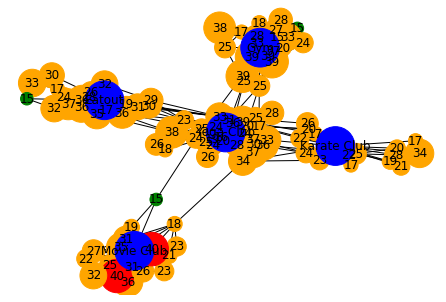

In [19]:
i=0
while(i<30):
    G = UpdateBMIDueToSocialInfluence(G)
    VisualiseGraph(G)
    clear_output(wait = True)
    plt.pause(0.5)
    i=i+1

***
Now,Let's put everything together and visualise it as a whole process.<br>
It Includes All the functions which we have seen before.

Iteration number:  50


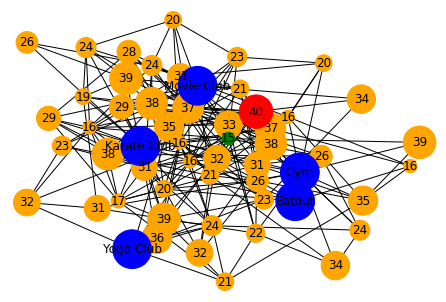

In [13]:
DemoGraph = CreateGraph(50)
print('New graph created!')
VisualiseGraph(DemoGraph)
plt.pause(2)
clear_output(wait=True)
DemoGraph = AddEdgesToFoci(DemoGraph)
print('Nodes connected to foci nodes at random..')
VisualiseGraph(DemoGraph)
plt.pause(2)
clear_output(wait=True)
i=0
while(i<50):
    print('Iteration number: ',i+1)
    DemoGraph = UpdateBMIDueToSocialInfluence(DemoGraph)
    DemoGraph = Homophily(DemoGraph)
    DemoGraph = TriadicClosure(DemoGraph,0.001)
    VisualiseGraph(DemoGraph)
    clear_output(wait = True)
    plt.pause(1)
    i=i+1